# 📌 Meaning and Use:
Kruskal-Wallis Test checks if 3 or more independent groups have the same distribution.

It's a non-parametric alternative to One-Way ANOVA.

Use case: When data is not normally distributed or variances are unequal.



# 📜 1. Problem Statement
### Problem:
Swiggy wants to know if Customer Ratings differ significantly across Platforms (Mobile, Web, Tablet).

#### 5W1H:

What: Customer Ratings

Why: To optimize and invest more in underperforming platforms

When: Last 6 months

Where: Across India (Delhi, Mumbai, Bangalore, Chennai)

Who: Swiggy Users (New, Regular, Prime)

How: Kruskal-Wallis Test (Non-Parametric)

# 🏗️ 2. Generate Dataset

In [7]:
import pandas as pd
import numpy as np

np.random.seed(2025)

n = 9000

states = ['Delhi', 'Mumbai', 'Bangalore', 'Chennai']
platforms = ['Mobile', 'Web', 'Tablet']
user_types = ['New', 'Regular', 'Prime']

# Generate data
df = pd.DataFrame({
    'Customer_ID': range(1, n+1),
    'State': np.random.choice(states, n),
    'Platform': np.random.choice(platforms, n),
    'User_Type': np.random.choice(user_types, n),
})

# Simulate Customer Ratings
df['Customer_Rating'] = df.apply(lambda x:
    np.random.normal(4.2, 0.5) if x['Platform'] == 'Mobile' else
    np.random.normal(3.8, 0.6) if x['Platform'] == 'Web' else
    np.random.normal(3.5, 0.7), axis=1
)

# Clip ratings to between 1 and 5
df['Customer_Rating'] = df['Customer_Rating'].clip(1,5)

df.head()


,Customer_ID,State,Platform,User_Type,Customer_Rating
0,1,Bangalore,Web,New,2.213781
1,2,Bangalore,Tablet,New,3.134366
2,3,Bangalore,Tablet,New,2.949629
3,4,Bangalore,Web,Prime,3.943701
4,5,Delhi,Tablet,Prime,3.229265


# 🧹 3. Data Cleaning + EDA

Customer_ID        0
State              0
Platform           0
User_Type          0
Customer_Rating    0
dtype: int64
       Customer_ID  Customer_Rating
count  9000.000000      9000.000000
mean   4500.500000         3.829056
std    2598.220545         0.654865
min       1.000000         1.109735
25%    2250.750000         3.386941
50%    4500.500000         3.867962
75%    6750.250000         4.308959
max    9000.000000         5.000000


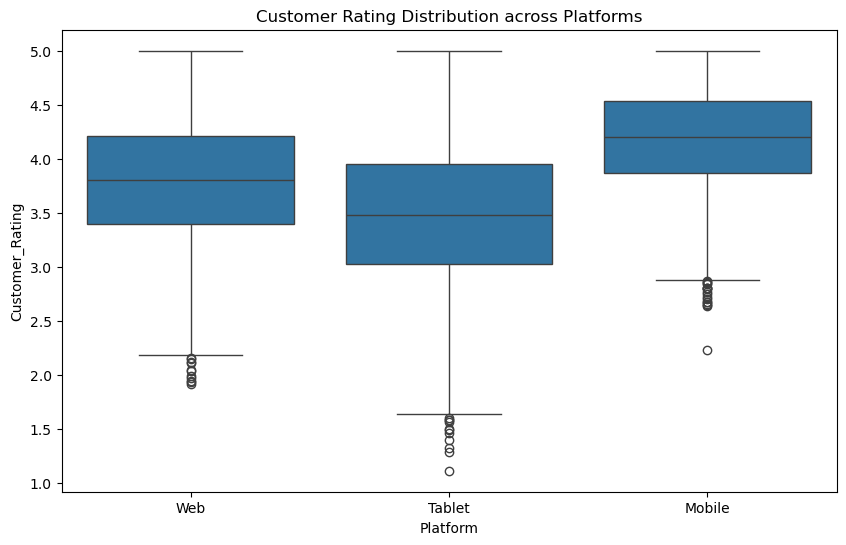

In [11]:
# Check nulls
print(df.isnull().sum())

# Basic summary
print(df.describe())

# Boxplot to visualize distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Platform', y='Customer_Rating', data=df)
plt.title('Customer Rating Distribution across Platforms')
plt.show()


# 📈 4. Check Normality & Interpretation

In [16]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
for platform in df['Platform'].unique():
    ratings = df[df['Platform'] == platform]['Customer_Rating']
    stat, p = shapiro(ratings.sample(500, random_state=42))  # Shapiro can crash with large n, sample 500
    print(f'Platform: {platform}, p-value: {p}')

# Interpretation
# If p < 0.05 => Not Normal


if p < 0.05:
    print("Ratings are NOT normally distributed across platforms (Reject H₀)")
else:
    print("Ratings are normally distributed across platforms (Fail to reject H₀)")



Platform: Web, p-value: 0.02162756238326406
Platform: Tablet, p-value: 0.005046044702552626
Platform: Mobile, p-value: 4.342401929087266e-07
Ratings are NOT normally distributed across platforms (Reject H₀)


# Extra Step 1: Distribution Plots for each Platform

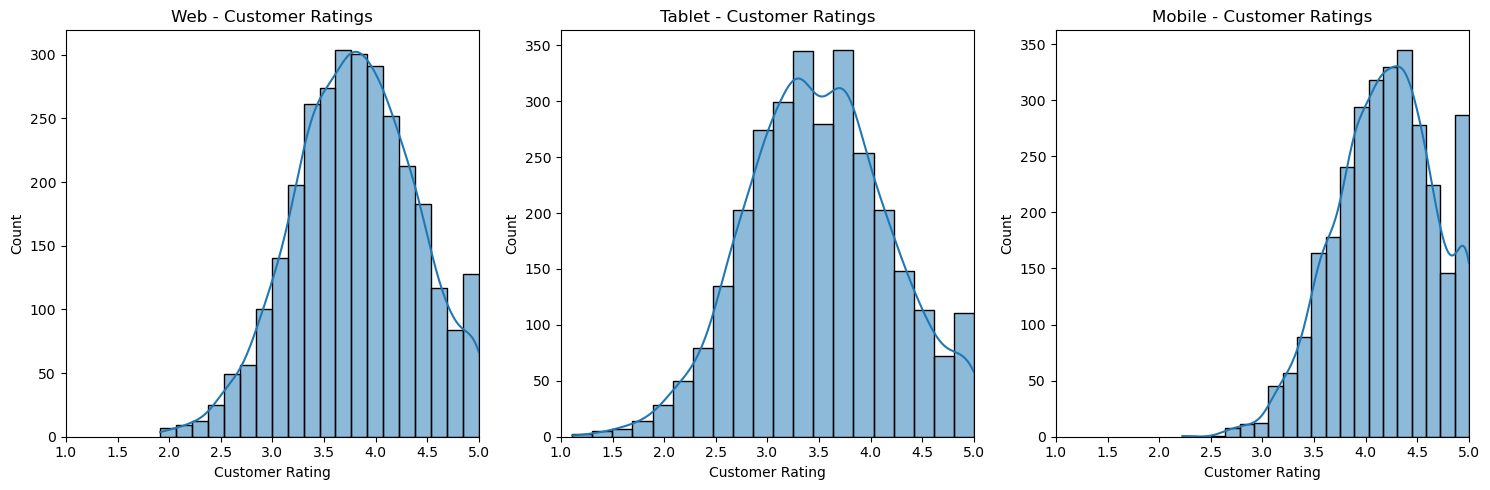

In [19]:
# Distribution plots
plt.figure(figsize=(15,5))

for i, platform in enumerate(df['Platform'].unique()):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[df['Platform']==platform]['Customer_Rating'], kde=True, bins=20)
    plt.title(f'{platform} - Customer Ratings')
    plt.xlabel('Customer Rating')
    plt.xlim(1,5)

plt.tight_layout()
plt.show()


# Extra Step 2: Variance Check (Levene’s Test)
Before non-parametric tests, it's good to check variance behavior too.
(Technically, Kruskal-Wallis doesn't assume equal variances, but it's good practice.)


In [28]:
from scipy.stats import levene

# Correct subsets
mobile = df[df['Platform'] == 'Mobile']['Customer_Rating']
web = df[df['Platform'] == 'Web']['Customer_Rating']
tablet = df[df['Platform'] == 'Tablet']['Customer_Rating']

# Levene’s test for equal variances
stat, p_var = levene(mobile, web, tablet)
print('Levene’s Test Statistic=%.3f, p-value=%.8f' % (stat, p_var))

# Interpretation
alpha = 0.05
if p_var < alpha:
    print("🔵 Variances are significantly different between Platforms (Reject H₀)")
else:
    print("🟢 Variances are similar across Platforms (Fail to reject H₀)")


Levene’s Test Statistic=167.483, p-value=0.00000000
🔵 Variances are significantly different between Platforms (Reject H₀)


# 🧪 5. Hypothesis Testing (Kruskal-Wallis)

In [31]:
from scipy.stats import kruskal

mobile = df[df['Platform']=='Mobile']['Customer_Rating']
web = df[df['Platform']=='Web']['Customer_Rating']
tablet = df[df['Platform']=='Tablet']['Customer_Rating']

# Kruskal-Wallis Test
stat, p = kruskal(mobile, web, tablet)
print('Kruskal-Wallis Test Statistic=%.3f, p-value=%.8f' % (stat, p))


Kruskal-Wallis Test Statistic=1682.733, p-value=0.00000000


# 📊 6. Interpretation + Business Action

In [34]:
alpha = 0.05
if p < alpha:
    print("✅ Significant difference exists in Customer Ratings between Platforms (Reject H₀)")
    print("🎯 Business Action: Investigate weaker platforms (like Tablet) and improve UX, design, or service.")
else:
    print("❌ No significant difference in Customer Ratings between Platforms (Fail to reject H₀)")
    print("🎯 Business Action: No major platform-specific action needed.")


✅ Significant difference exists in Customer Ratings between Platforms (Reject H₀)
🎯 Business Action: Investigate weaker platforms (like Tablet) and improve UX, design, or service.
